In [108]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import math

In [138]:
env = gym.make('CartPole-v0')

[2017-11-19 14:21:46,433] Making new env: CartPole-v0


In [139]:
print(env.observation_space.high,' to ', env.observation_space.low)

[  4.80000000e+00   3.40282347e+38   4.18879020e-01   3.40282347e+38]  to  [ -4.80000000e+00  -3.40282347e+38  -4.18879020e-01  -3.40282347e+38]


In [140]:
states = env.observation_space.shape[0]
actions = env.action_space.n

In [141]:
# vars to store dists
locals().update({'state_dist_{0}'.format(i):[] for i in range(states)})

In [142]:
for i in range(1000):
    s = env.reset()
    for i in range(500):
        state_dist_0.append(s[0])
        state_dist_1.append(s[1])
        state_dist_2.append(s[2])
        state_dist_3.append(s[3])
        new_s, reward, done, _ = env.step(env.action_space.sample())
        s = new_s
        if done:
            break

(array([   72.,   498.,  1632.,  4159.,  6990.,  5028.,  2502.,   894.,
          175.,    16.]),
 array([-2.73039724, -2.14750087, -1.56460449, -0.98170812, -0.39881175,
         0.18408462,  0.766981  ,  1.34987737,  1.93277374,  2.51567011,
         3.09856649]),
 <a list of 10 Patch objects>)

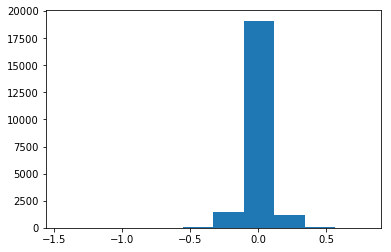

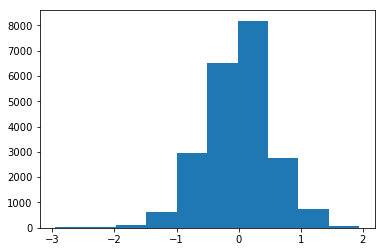

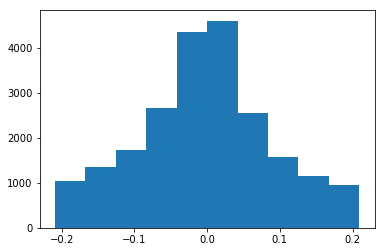

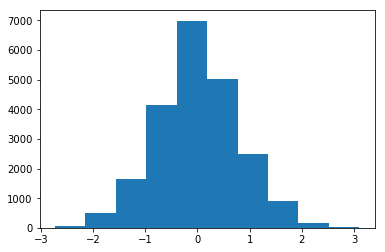

In [143]:
%matplotlib inline
plt.figure(1)
plt.hist(state_dist_0)
plt.figure(2)
plt.hist(state_dist_1)
plt.figure(3)
plt.hist(state_dist_2)
plt.figure(4)
plt.hist(state_dist_3)

In [252]:
class agent_qlearning():
    def __init__(self, gamma, learningrate, explorestop):
        self.learningrate = learningrate
        self.q_values = {}
        self.epsilon = 1
        self.gamma = gamma
        self.explorestop = explorestop
        
    def getAction(self, state):
        # if self.epsilon >= np.random.random():
        if self.epsilon >= self.explorestop:
            return int(np.random.randint(2, size=1))
        else:
            return np.argmax(self.q_values.get(state, [0, 0]))
    
    def setQValue(self, state, action, val):
        temp = self.q_values.get(state, [0, 0])
        temp[action] = val
        self.q_values[state] = temp
        
    def getQValue(self, state, action):
        return self.q_values.get(state, [0, 0])[action]
    
    def updateQValues(self, state, action, next_state, reward):
        QTarget = reward + self.gamma * np.max(self.q_values.get(next_state, [0, 0]))
        QActual = self.getQValue(state, action)
        Qupdate = (1 - self.learningrate) * QActual + self.learningrate * QTarget
        self.setQValue(state, action, Qupdate)

In [253]:
# unit testing 
agent = agent_qlearning(0.5, 0.01, 0.2)
agent.q_values['k'] = [1,0]
assert (agent.q_values.get('k', [0, 0]) == [1, 0]),'Setting broken'
assert (agent.q_values.get('j', [0, 0]) == [0, 0]),'Defaulting broken'
agent.setQValue('k', 1, 1)
assert (agent.q_values.get('k', [0, 0]) == [1, 1]),'Setting Qvalues Function broken'
assert (agent.getQValue('j', 0) == 0), 'Getting Q values of action in state broken'

In [254]:
from gym.core import ObservationWrapper

class ObservationBinarizer(ObservationWrapper):
    def _observation(self, state):
        state[0] = round(state[0], 2)
        state[1] = round(state[1], 0)
        state[2] = round(state[2], 1)
        state[3] = round(state[3], 0)
        
        return tuple(state)

In [242]:
env = ObservationBinarizer(gym.make('CartPole-v0'))

[2017-11-19 15:19:20,113] Making new env: CartPole-v0


In [261]:
episodes = 7000
t_max = 500
rewards = []
agent = agent_qlearning(0.9, 0.1, 0.2)

for i in range(episodes):
    s = env.reset()
    total_reward = 0
    for time in range(t_max):
        a = agent.getAction(s)
        next_s, reward, done, info = env.step(a)
        total_reward = total_reward + reward
        if done:
            reward = -100
        agent.updateQValues(s, a, next_s, reward)
        s = next_s
        if done:
            rewards.append(total_reward)
            agent.epsilon = agent.epsilon * 0.9995
            print('Episode: {0} Reward: {1} Epsilon: {2:.4f}'.format(i+1, total_reward, agent.epsilon))
            break
        

Episode: 1 Reward: 11.0 Epsilon: 0.9995
Episode: 2 Reward: 16.0 Epsilon: 0.9990
Episode: 3 Reward: 23.0 Epsilon: 0.9985
Episode: 4 Reward: 31.0 Epsilon: 0.9980
Episode: 5 Reward: 14.0 Epsilon: 0.9975
Episode: 6 Reward: 10.0 Epsilon: 0.9970
Episode: 7 Reward: 20.0 Epsilon: 0.9965
Episode: 8 Reward: 16.0 Epsilon: 0.9960
Episode: 9 Reward: 21.0 Epsilon: 0.9955
Episode: 10 Reward: 47.0 Epsilon: 0.9950
Episode: 11 Reward: 18.0 Epsilon: 0.9945
Episode: 12 Reward: 29.0 Epsilon: 0.9940
Episode: 13 Reward: 12.0 Epsilon: 0.9935
Episode: 14 Reward: 12.0 Epsilon: 0.9930
Episode: 15 Reward: 11.0 Epsilon: 0.9925
Episode: 16 Reward: 24.0 Epsilon: 0.9920
Episode: 17 Reward: 14.0 Epsilon: 0.9915
Episode: 18 Reward: 20.0 Epsilon: 0.9910
Episode: 19 Reward: 26.0 Epsilon: 0.9905
Episode: 20 Reward: 23.0 Epsilon: 0.9900
Episode: 21 Reward: 19.0 Epsilon: 0.9896
Episode: 22 Reward: 17.0 Epsilon: 0.9891
Episode: 23 Reward: 14.0 Epsilon: 0.9886
Episode: 24 Reward: 20.0 Epsilon: 0.9881
Episode: 25 Reward: 19.0 

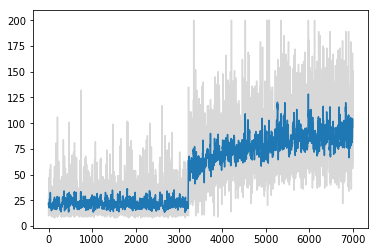

In [262]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

smoothed_rews = running_mean(rewards, 10)
plt.plot(rewards, color='grey', alpha=0.3)
plt.plot(smoothed_rews)

In [267]:
s = env.reset()
total_reward = 0
for time in range(t_max):
    env.render()
    a = agent.getAction(s)
    next_s, reward, done, info = env.step(a)
    total_reward = total_reward + reward
    s = next_s
    if done:
        print('Reward: {0}'.format(total_reward))
        break

Reward: 74.0


In [259]:
len(agent.q_values)

3989